In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [79]:
service = pd.read_csv('inquiry_services.csv')

In [3]:
service.head()

,id,inquiry_id,service_id,deadline,created_at,updated_at,order_number,is_completed
0,84,463,2,2021-07-12,2021-06-10 20:51:01,2021-11-08 01:19:18,1,0
1,85,464,2,2021-07-12,2021-06-10 20:52:01,2021-11-08 01:19:18,1,0
2,98,467,4,2021-06-24,2021-06-24 22:54:38,2021-11-08 01:19:15,1,0
3,99,467,5,2021-06-24,2021-06-24 22:54:38,2021-11-08 01:19:15,2,0
4,118,473,1,2021-06-29,2021-06-29 17:17:13,2021-11-08 01:19:15,1,0


In [4]:
sub_service = pd.read_csv('inquiry_sub_services.csv')

In [5]:
sub_service.head()

,id,inquiry_id,sub_service_id,parent_service,deadline,status,order_number,created_at,updated_at,time_period,completed_at
0,305,463,6,2,2021-06-14,1,4,2021-11-08 01:19:18,2022-08-13 06:19:30,1,NaN
1,306,463,7,2,2021-06-16,1,5,2021-11-08 01:19:18,2022-08-13 06:19:30,2,NaN
2,307,463,8,2,2021-06-30,1,6,2021-11-08 01:19:18,2022-08-13 06:19:30,10,NaN
3,308,463,9,2,2021-07-07,1,1,2021-11-08 01:19:18,2022-08-13 06:19:30,5,NaN
4,309,463,10,2,2021-07-12,1,2,2021-11-08 01:19:18,2022-08-13 06:19:31,3,NaN


In [6]:
sub_service.count()

id                17668
inquiry_id        17668
sub_service_id    17668
parent_service    17668
deadline          17668
status            17668
order_number      17668
created_at        17668
updated_at        17668
time_period       17668
completed_at       1134
dtype: int64

In [7]:
sub_service['parent_service']=sub_service.parent_service.replace({1:'start',2:'teck pack',3:'Sample fabric sourcing',4:'Sample process',5:'Bulk fabric sourcing',6:'Bulk production',7:'Bulk shipment',8:'completed'})

In [8]:
sub_service

,id,inquiry_id,sub_service_id,parent_service,deadline,status,order_number,created_at,updated_at,time_period,completed_at
0,305,463,6,teck pack,2021-06-14,1,4,2021-11-08 01:19:18,2022-08-13 06:19:30,1,NaN
1,306,463,7,teck pack,2021-06-16,1,5,2021-11-08 01:19:18,2022-08-13 06:19:30,2,NaN
2,307,463,8,teck pack,2021-06-30,1,6,2021-11-08 01:19:18,2022-08-13 06:19:30,10,NaN
3,308,463,9,teck pack,2021-07-07,1,1,2021-11-08 01:19:18,2022-08-13 06:19:30,5,NaN
4,309,463,10,teck pack,2021-07-12,1,2,2021-11-08 01:19:18,2022-08-13 06:19:31,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...
17663,23586,845,66,Bulk production,2023-05-03,1,5,2023-01-24 17:32:32,2023-01-24 19:03:20,1,NaN
17664,23587,845,75,Bulk shipment,2023-05-04,1,1,2023-01-24 17:32:32,2023-01-24 19:03:20,1,NaN
17665,23588,845,76,Bulk shipment,2023-05-15,1,2,2023-01-24 17:32:32,2023-01-24 19:03:20,7,NaN
17666,23589,845,77,Bulk shipment,2023-05-16,1,3,2023-01-24 17:32:32,2023-01-24 19:03:20,1,NaN


In [9]:
sub_service.sub_service_id.nunique()

83

##  Understanding the Data

In [80]:
inquery = pd.read_csv('inquiries.csv')

In [11]:
inquery.head()

,id,created_by,style_number,order_number,product_type,bulk_order_quantity,colour_number,materials,currency,additional_information,...,default_image,status,public_status,package,product_name_consumer,product_name_non_consumer,need_trace_approval,trace_rejected_comment,trace_tracking_code,style_name
0,17,117,210528001LAA,1,24,1,1,4,GBP,NaN,...,NaN,inactive,1,2,NaN,NaN,NaN,NaN,NaN,NaN
1,18,117,210528002LAA,2,24,1,2,4,GBP,NaN,...,NaN,inactive,1,2,NaN,NaN,NaN,NaN,NaN,NaN
2,19,117,210528003LAA,3,24,1,2,4,GBP,NaN,...,NaN,inactive,1,2,NaN,NaN,NaN,NaN,NaN,NaN
3,20,117,210528004LAA,4,24,3,3,4,GBP,NaN,...,NaN,inactive,1,2,NaN,NaN,NaN,NaN,NaN,NaN
4,21,117,210528005LAA,5,24,1,1,4,GBP,NaN,...,NaN,inactive,1,2,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
inquery.tail()

,id,created_by,style_number,order_number,product_type,bulk_order_quantity,colour_number,materials,currency,additional_information,...,default_image,status,public_status,package,product_name_consumer,product_name_non_consumer,need_trace_approval,trace_rejected_comment,trace_tracking_code,style_name
607,841,2042,221219001LEC,1,10,1000,4,3,USD,NaN,...,NaN,active,1,2,NaN,NaN,NaN,NaN,NaN,Bra
608,842,2043,221230001NNA,1,15,50,3,1,GBP,NaN,...,NaN,inactive,0,1,NaN,NaN,NaN,NaN,NaN,Pyjamas
609,843,1916,230123007RED,7,19,600,2,3,USD,This is a duplicate of 220412001RED,...,NaN,active,1,2,NaN,NaN,NaN,NaN,NaN,NaN
610,844,1916,230123008RED,8,19,600,2,3,USD,This is a duplicate of 220412001RED,...,NaN,active,1,2,NaN,NaN,NaN,NaN,NaN,NaN
611,845,2053,230124001QUA,1,25,1000,3,2,USD,NaN,...,NaN,active,1,2,NaN,NaN,NaN,NaN,NaN,Chef Jacket


In [13]:
#display max columns
pd.set_option('display.max_columns', None)

In [14]:
#print the dataframe inquery
display(inquery)

,id,created_by,style_number,order_number,product_type,bulk_order_quantity,colour_number,materials,currency,additional_information,deleted_at,created_at,updated_at,categories,account_manager_id,company_id,default_image,status,public_status,package,product_name_consumer,product_name_non_consumer,need_trace_approval,trace_rejected_comment,trace_tracking_code,style_name
0,17,117,210528001LAA,1,24,1,1,4,GBP,NaN,NaN,2019-11-03 08:06:29,2022-06-03 16:21:12,6,402.0,12.0,NaN,inactive,1,2,NaN,NaN,NaN,NaN,NaN,NaN
1,18,117,210528002LAA,2,24,1,2,4,GBP,NaN,NaN,2019-11-03 08:07:04,2022-06-03 16:19:31,6,402.0,12.0,NaN,inactive,1,2,NaN,NaN,NaN,NaN,NaN,NaN
2,19,117,210528003LAA,3,24,1,2,4,GBP,NaN,NaN,2019-11-03 08:07:27,2022-06-03 16:22:43,6,402.0,12.0,NaN,inactive,1,2,NaN,NaN,NaN,NaN,NaN,NaN
3,20,117,210528004LAA,4,24,3,3,4,GBP,NaN,NaN,2019-11-03 08:08:05,2022-06-03 16:17:43,6,402.0,12.0,NaN,inactive,1,2,NaN,NaN,NaN,NaN,NaN,NaN
4,21,117,210528005LAA,5,24,1,1,4,GBP,NaN,NaN,2019-11-03 08:08:25,2022-06-03 16:16:46,6,402.0,12.0,NaN,inactive,1,2,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,841,2042,221219001LEC,1,10,1000,4,3,USD,NaN,NaN,2022-12-19 11:48:56,2023-01-23 05:37:17,1,402.0,NaN,NaN,active,1,2,NaN,NaN,NaN,NaN,NaN,Bra
608,842,2043,221230001NNA,1,15,50,3,1,GBP,NaN,NaN,2022-12-30 11:49:38,2022-12-30 11:50:55,1,NaN,NaN,NaN,inactive,0,1,NaN,NaN,NaN,NaN,NaN,Pyjamas
609,843,1916,230123007RED,7,19,600,2,3,USD,This is a duplicate of 220412001RED,NaN,2023-01-23 15:26:05,2023-01-23 15:28:34,2,402.0,NaN,NaN,active,1,2,NaN,NaN,NaN,NaN,NaN,NaN
610,844,1916,230123008RED,8,19,600,2,3,USD,This is a duplicate of 220412001RED,NaN,2023-01-23 15:26:17,2023-01-23 15:29:33,2,402.0,NaN,NaN,active,1,2,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
#read product type data
product_df = pd.read_csv('product_types.csv')

In [16]:
product_df.head()

,id,name,created_at,updated_at,short_code
0,1,Activewear,2022-12-22 04:23:01,2022-12-22 04:23:01,active
1,2,Bridalwear,2022-12-22 04:23:01,2022-12-22 04:23:01,bridal
2,3,Casualwear,2022-12-22 04:23:01,2022-12-22 04:23:01,casual
3,4,Denim,2022-12-22 04:23:01,2022-12-22 04:23:01,denim
4,5,Eveningwear,2022-12-22 04:23:01,2022-12-22 04:23:01,evening


In [82]:
#renaming the columns
product_df = product_df.rename(columns={'id':'product_type','name':'product_name','short_code':'product_code'})

In [18]:
product_df

,product_type,product_name,created_at,updated_at,product_code
0,1,Activewear,2022-12-22 04:23:01,2022-12-22 04:23:01,active
1,2,Bridalwear,2022-12-22 04:23:01,2022-12-22 04:23:01,bridal
2,3,Casualwear,2022-12-22 04:23:01,2022-12-22 04:23:01,casual
3,4,Denim,2022-12-22 04:23:01,2022-12-22 04:23:01,denim
4,5,Eveningwear,2022-12-22 04:23:01,2022-12-22 04:23:01,evening
5,6,Footwear,2022-12-22 04:23:01,2022-12-22 04:23:01,foot
6,7,Formalwear,2022-12-22 04:23:01,2022-12-22 04:23:01,formal
7,8,Homewear,2022-12-22 04:23:01,2022-12-22 04:23:01,home
8,9,Hospitalwear,2022-12-22 04:23:01,2022-12-22 04:23:01,hospital
9,10,Intimates,2022-12-22 04:23:01,2022-12-22 04:23:01,intimates


In [83]:
#merge inquery and product df using product type
updated_inquery = inquery.merge(product_df,left_on='product_type',right_on='product_type')
updated_inquery

,id,created_by,style_number,order_number,product_type,bulk_order_quantity,colour_number,materials,currency,additional_information,deleted_at,created_at_x,updated_at_x,categories,account_manager_id,company_id,default_image,status,public_status,package,product_name_consumer,product_name_non_consumer,need_trace_approval,trace_rejected_comment,trace_tracking_code,style_name,product_name,created_at_y,updated_at_y,product_code
0,17,117,210528001LAA,1,24,1,1,4,GBP,NaN,NaN,2019-11-03 08:06:29,2022-06-03 16:21:12,6,402.0,12.0,NaN,inactive,1,2,NaN,NaN,NaN,NaN,NaN,NaN,Swimwear,2022-12-22 04:23:01,2022-12-22 04:23:01,swim
1,18,117,210528002LAA,2,24,1,2,4,GBP,NaN,NaN,2019-11-03 08:07:04,2022-06-03 16:19:31,6,402.0,12.0,NaN,inactive,1,2,NaN,NaN,NaN,NaN,NaN,NaN,Swimwear,2022-12-22 04:23:01,2022-12-22 04:23:01,swim
2,19,117,210528003LAA,3,24,1,2,4,GBP,NaN,NaN,2019-11-03 08:07:27,2022-06-03 16:22:43,6,402.0,12.0,NaN,inactive,1,2,NaN,NaN,NaN,NaN,NaN,NaN,Swimwear,2022-12-22 04:23:01,2022-12-22 04:23:01,swim
3,20,117,210528004LAA,4,24,3,3,4,GBP,NaN,NaN,2019-11-03 08:08:05,2022-06-03 16:17:43,6,402.0,12.0,NaN,inactive,1,2,NaN,NaN,NaN,NaN,NaN,NaN,Swimwear,2022-12-22 04:23:01,2022-12-22 04:23:01,swim
4,21,117,210528005LAA,5,24,1,1,4,GBP,NaN,NaN,2019-11-03 08:08:25,2022-06-03 16:16:46,6,402.0,12.0,NaN,inactive,1,2,NaN,NaN,NaN,NaN,NaN,NaN,Swimwear,2022-12-22 04:23:01,2022-12-22 04:23:01,swim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,802,2007,220929001REE,1,27,1000,3,1,USD,Looking for better understanding. Let’s connec...,NaN,2022-09-29 10:57:15,2022-10-15 13:36:13,4,402.0,NaN,NaN,active,0,3,NaN,NaN,NaN,NaN,NaN,NaN,Winterwear,2022-12-22 04:23:01,2022-12-22 04:23:01,winter
608,772,1697,220725005TEC,5,11,199,9,2,USD,NaN,NaN,2022-07-25 13:57:57,2022-07-25 14:36:33,3,NaN,NaN,NaN,inactive,1,2,NaN,NaN,NaN,NaN,NaN,NaN,Jewellery,2022-12-22 04:23:01,2022-12-22 04:23:01,jewelry
609,815,476,221022009DUA,9,28,75,1,1,USD,"Clear (see-through) Backpack: clear material, ...",NaN,2022-10-22 01:46:03,2023-01-17 10:41:41,5,402.0,NaN,NaN,active,1,2,NaN,NaN,NaN,NaN,NaN,NaN,Other,2022-12-22 04:23:01,2022-12-22 04:23:01,other
610,836,1852,221114003CLB,3,28,2000,1,2,USD,I'm looking for delicate bags to be producecd ...,NaN,2022-11-14 16:39:42,2023-01-05 08:31:20,6,402.0,NaN,NaN,active,1,2,NaN,NaN,NaN,NaN,NaN,Mesh bag,Other,2022-12-22 04:23:01,2022-12-22 04:23:01,other


In [84]:
updated_inquery = updated_inquery.drop(updated_inquery[['created_at_y','updated_at_y']],axis=1)

In [85]:
updated_inquery

,id,created_by,style_number,order_number,product_type,bulk_order_quantity,colour_number,materials,currency,additional_information,deleted_at,created_at_x,updated_at_x,categories,account_manager_id,company_id,default_image,status,public_status,package,product_name_consumer,product_name_non_consumer,need_trace_approval,trace_rejected_comment,trace_tracking_code,style_name,product_name,product_code
0,17,117,210528001LAA,1,24,1,1,4,GBP,NaN,NaN,2019-11-03 08:06:29,2022-06-03 16:21:12,6,402.0,12.0,NaN,inactive,1,2,NaN,NaN,NaN,NaN,NaN,NaN,Swimwear,swim
1,18,117,210528002LAA,2,24,1,2,4,GBP,NaN,NaN,2019-11-03 08:07:04,2022-06-03 16:19:31,6,402.0,12.0,NaN,inactive,1,2,NaN,NaN,NaN,NaN,NaN,NaN,Swimwear,swim
2,19,117,210528003LAA,3,24,1,2,4,GBP,NaN,NaN,2019-11-03 08:07:27,2022-06-03 16:22:43,6,402.0,12.0,NaN,inactive,1,2,NaN,NaN,NaN,NaN,NaN,NaN,Swimwear,swim
3,20,117,210528004LAA,4,24,3,3,4,GBP,NaN,NaN,2019-11-03 08:08:05,2022-06-03 16:17:43,6,402.0,12.0,NaN,inactive,1,2,NaN,NaN,NaN,NaN,NaN,NaN,Swimwear,swim
4,21,117,210528005LAA,5,24,1,1,4,GBP,NaN,NaN,2019-11-03 08:08:25,2022-06-03 16:16:46,6,402.0,12.0,NaN,inactive,1,2,NaN,NaN,NaN,NaN,NaN,NaN,Swimwear,swim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,802,2007,220929001REE,1,27,1000,3,1,USD,Looking for better understanding. Let’s connec...,NaN,2022-09-29 10:57:15,2022-10-15 13:36:13,4,402.0,NaN,NaN,active,0,3,NaN,NaN,NaN,NaN,NaN,NaN,Winterwear,winter
608,772,1697,220725005TEC,5,11,199,9,2,USD,NaN,NaN,2022-07-25 13:57:57,2022-07-25 14:36:33,3,NaN,NaN,NaN,inactive,1,2,NaN,NaN,NaN,NaN,NaN,NaN,Jewellery,jewelry
609,815,476,221022009DUA,9,28,75,1,1,USD,"Clear (see-through) Backpack: clear material, ...",NaN,2022-10-22 01:46:03,2023-01-17 10:41:41,5,402.0,NaN,NaN,active,1,2,NaN,NaN,NaN,NaN,NaN,NaN,Other,other
610,836,1852,221114003CLB,3,28,2000,1,2,USD,I'm looking for delicate bags to be producecd ...,NaN,2022-11-14 16:39:42,2023-01-05 08:31:20,6,402.0,NaN,NaN,active,1,2,NaN,NaN,NaN,NaN,NaN,Mesh bag,Other,other


In [22]:
updated_inquery.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612 entries, 0 to 611
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         612 non-null    int64  
 1   created_by                 612 non-null    int64  
 2   style_number               612 non-null    object 
 3   order_number               612 non-null    int64  
 4   product_type               612 non-null    int64  
 5   bulk_order_quantity        612 non-null    int64  
 6   colour_number              612 non-null    int64  
 7   materials                  612 non-null    int64  
 8   currency                   612 non-null    object 
 9   additional_information     424 non-null    object 
 10  deleted_at                 64 non-null     object 
 11  created_at_x               612 non-null    object 
 12  updated_at_x               612 non-null    object 
 13  categories                 612 non-null    int64  

In [23]:
updated_inquery['package'].nunique()

4

In [86]:
#read materials dataset
material_df = pd.read_csv('materials.csv')
material_df = material_df.drop(material_df[['created_at','updated_at']],axis=1)
material_df

,id,name,short_code
0,1,Organic fabric,organic_fabric
1,2,Woven fabric,woven_fabric
2,3,Knit fabric,knit_fabric
3,4,Non-woven fabric,non_woven_fabric


In [87]:
#rename few columns
material_df = material_df.rename(columns={'id': 'materials', 'name': 'material_name','short_code':'materials_code'})
material_df

,materials,material_name,materials_code
0,1,Organic fabric,organic_fabric
1,2,Woven fabric,woven_fabric
2,3,Knit fabric,knit_fabric
3,4,Non-woven fabric,non_woven_fabric


In [88]:
#merge the updated dataframes
updated_df = updated_inquery.merge(material_df,left_on='materials',right_on='materials')

In [89]:
#remove all the unwanted columns
updated_inquery = updated_df.drop(updated_inquery[['product_name_consumer','product_name_non_consumer','need_trace_approval','trace_rejected_comment',
                                'trace_tracking_code','default_image','created_by','style_number','additional_information','deleted_at']],axis=1)

In [90]:
updated_inquery

,id,order_number,product_type,bulk_order_quantity,colour_number,materials,currency,created_at_x,updated_at_x,categories,account_manager_id,company_id,status,public_status,package,style_name,product_name,product_code,material_name,materials_code
0,17,1,24,1,1,4,GBP,2019-11-03 08:06:29,2022-06-03 16:21:12,6,402.0,12.0,inactive,1,2,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric
1,18,2,24,1,2,4,GBP,2019-11-03 08:07:04,2022-06-03 16:19:31,6,402.0,12.0,inactive,1,2,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric
2,19,3,24,1,2,4,GBP,2019-11-03 08:07:27,2022-06-03 16:22:43,6,402.0,12.0,inactive,1,2,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric
3,20,4,24,3,3,4,GBP,2019-11-03 08:08:05,2022-06-03 16:17:43,6,402.0,12.0,inactive,1,2,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric
4,21,5,24,1,1,4,GBP,2019-11-03 08:08:25,2022-06-03 16:16:46,6,402.0,12.0,inactive,1,2,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,843,7,19,600,2,3,USD,2023-01-23 15:26:05,2023-01-23 15:28:34,2,402.0,NaN,active,1,2,NaN,Seamless,seamless,Knit fabric,knit_fabric
608,844,8,19,600,2,3,USD,2023-01-23 15:26:17,2023-01-23 15:29:33,2,402.0,NaN,active,1,2,NaN,Seamless,seamless,Knit fabric,knit_fabric
609,592,1,14,200,2,3,USD,2021-10-23 15:34:20,2022-05-23 12:46:22,2,402.0,NaN,inactive,1,2,NaN,Leisurewear,leisure,Knit fabric,knit_fabric
610,789,10,27,80,2,3,GBP,2022-08-23 10:18:37,2022-08-23 15:57:07,1,1693.0,NaN,active,1,3,NaN,Winterwear,winter,Knit fabric,knit_fabric


In [91]:
#replace numerical values to categorical values
updated_inquery['package']=updated_inquery['package'].replace({1:'high speed production',2:'medium speed production',3:'longer speed production'})

In [92]:
updated_inquery

,id,order_number,product_type,bulk_order_quantity,colour_number,materials,currency,created_at_x,updated_at_x,categories,account_manager_id,company_id,status,public_status,package,style_name,product_name,product_code,material_name,materials_code
0,17,1,24,1,1,4,GBP,2019-11-03 08:06:29,2022-06-03 16:21:12,6,402.0,12.0,inactive,1,medium speed production,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric
1,18,2,24,1,2,4,GBP,2019-11-03 08:07:04,2022-06-03 16:19:31,6,402.0,12.0,inactive,1,medium speed production,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric
2,19,3,24,1,2,4,GBP,2019-11-03 08:07:27,2022-06-03 16:22:43,6,402.0,12.0,inactive,1,medium speed production,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric
3,20,4,24,3,3,4,GBP,2019-11-03 08:08:05,2022-06-03 16:17:43,6,402.0,12.0,inactive,1,medium speed production,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric
4,21,5,24,1,1,4,GBP,2019-11-03 08:08:25,2022-06-03 16:16:46,6,402.0,12.0,inactive,1,medium speed production,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,843,7,19,600,2,3,USD,2023-01-23 15:26:05,2023-01-23 15:28:34,2,402.0,NaN,active,1,medium speed production,NaN,Seamless,seamless,Knit fabric,knit_fabric
608,844,8,19,600,2,3,USD,2023-01-23 15:26:17,2023-01-23 15:29:33,2,402.0,NaN,active,1,medium speed production,NaN,Seamless,seamless,Knit fabric,knit_fabric
609,592,1,14,200,2,3,USD,2021-10-23 15:34:20,2022-05-23 12:46:22,2,402.0,NaN,inactive,1,medium speed production,NaN,Leisurewear,leisure,Knit fabric,knit_fabric
610,789,10,27,80,2,3,GBP,2022-08-23 10:18:37,2022-08-23 15:57:07,1,1693.0,NaN,active,1,longer speed production,NaN,Winterwear,winter,Knit fabric,knit_fabric


In [93]:
# get the list of column names and sort them in ascending order
column_names = ['id', 'created_at_x','updated_at_x', 'order_number','product_name','product_code','product_type',
                'material_name', 'materials_code','materials','bulk_order_quantity','colour_number','currency', 
                'categories', 'account_manager_id', 'company_id','status', 'public_status', 'package', 'style_name']

In [94]:
updated_inquery.reindex(columns=column_names)

,id,created_at_x,updated_at_x,order_number,product_name,product_code,product_type,material_name,materials_code,materials,bulk_order_quantity,colour_number,currency,categories,account_manager_id,company_id,status,public_status,package,style_name
0,17,2019-11-03 08:06:29,2022-06-03 16:21:12,1,Swimwear,swim,24,Non-woven fabric,non_woven_fabric,4,1,1,GBP,6,402.0,12.0,inactive,1,medium speed production,NaN
1,18,2019-11-03 08:07:04,2022-06-03 16:19:31,2,Swimwear,swim,24,Non-woven fabric,non_woven_fabric,4,1,2,GBP,6,402.0,12.0,inactive,1,medium speed production,NaN
2,19,2019-11-03 08:07:27,2022-06-03 16:22:43,3,Swimwear,swim,24,Non-woven fabric,non_woven_fabric,4,1,2,GBP,6,402.0,12.0,inactive,1,medium speed production,NaN
3,20,2019-11-03 08:08:05,2022-06-03 16:17:43,4,Swimwear,swim,24,Non-woven fabric,non_woven_fabric,4,3,3,GBP,6,402.0,12.0,inactive,1,medium speed production,NaN
4,21,2019-11-03 08:08:25,2022-06-03 16:16:46,5,Swimwear,swim,24,Non-woven fabric,non_woven_fabric,4,1,1,GBP,6,402.0,12.0,inactive,1,medium speed production,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,843,2023-01-23 15:26:05,2023-01-23 15:28:34,7,Seamless,seamless,19,Knit fabric,knit_fabric,3,600,2,USD,2,402.0,NaN,active,1,medium speed production,NaN
608,844,2023-01-23 15:26:17,2023-01-23 15:29:33,8,Seamless,seamless,19,Knit fabric,knit_fabric,3,600,2,USD,2,402.0,NaN,active,1,medium speed production,NaN
609,592,2021-10-23 15:34:20,2022-05-23 12:46:22,1,Leisurewear,leisure,14,Knit fabric,knit_fabric,3,200,2,USD,2,402.0,NaN,inactive,1,medium speed production,NaN
610,789,2022-08-23 10:18:37,2022-08-23 15:57:07,10,Winterwear,winter,27,Knit fabric,knit_fabric,3,80,2,GBP,1,1693.0,NaN,active,1,longer speed production,NaN


In [95]:
#rename few columns
updated_inquery = updated_inquery.rename(columns={'created_at_x': 'order_date', 'updated_at_x': 'updated_date'})
updated_inquery

,id,order_number,product_type,bulk_order_quantity,colour_number,materials,currency,order_date,updated_date,categories,account_manager_id,company_id,status,public_status,package,style_name,product_name,product_code,material_name,materials_code
0,17,1,24,1,1,4,GBP,2019-11-03 08:06:29,2022-06-03 16:21:12,6,402.0,12.0,inactive,1,medium speed production,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric
1,18,2,24,1,2,4,GBP,2019-11-03 08:07:04,2022-06-03 16:19:31,6,402.0,12.0,inactive,1,medium speed production,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric
2,19,3,24,1,2,4,GBP,2019-11-03 08:07:27,2022-06-03 16:22:43,6,402.0,12.0,inactive,1,medium speed production,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric
3,20,4,24,3,3,4,GBP,2019-11-03 08:08:05,2022-06-03 16:17:43,6,402.0,12.0,inactive,1,medium speed production,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric
4,21,5,24,1,1,4,GBP,2019-11-03 08:08:25,2022-06-03 16:16:46,6,402.0,12.0,inactive,1,medium speed production,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,843,7,19,600,2,3,USD,2023-01-23 15:26:05,2023-01-23 15:28:34,2,402.0,NaN,active,1,medium speed production,NaN,Seamless,seamless,Knit fabric,knit_fabric
608,844,8,19,600,2,3,USD,2023-01-23 15:26:17,2023-01-23 15:29:33,2,402.0,NaN,active,1,medium speed production,NaN,Seamless,seamless,Knit fabric,knit_fabric
609,592,1,14,200,2,3,USD,2021-10-23 15:34:20,2022-05-23 12:46:22,2,402.0,NaN,inactive,1,medium speed production,NaN,Leisurewear,leisure,Knit fabric,knit_fabric
610,789,10,27,80,2,3,GBP,2022-08-23 10:18:37,2022-08-23 15:57:07,1,1693.0,NaN,active,1,longer speed production,NaN,Winterwear,winter,Knit fabric,knit_fabric


In [96]:
#replace numerical values to categorical values
updated_inquery['categories']=updated_inquery['categories'].replace({1:'Womenswear',2:'Menswear',
                                                                     3:'Kidswear',4:'Unisexwear',5:'Accessories',6:'Other'})

# EDA

In [97]:
#check the size of dataset
updated_inquery.shape

(612, 20)

In [36]:
#list the updated column names
new_col_names = list(updated_inquery.columns)

In [37]:
#check the datatype of each columns
updated_inquery[new_col_names].dtypes

id                        int64
order_number              int64
product_type              int64
bulk_order_quantity       int64
colour_number             int64
materials                 int64
currency                 object
order_date               object
order_completed_date     object
categories               object
account_manager_id      float64
company_id              float64
status                   object
public_status             int64
package                  object
style_name               object
product_name             object
product_code             object
material_name            object
materials_code           object
dtype: object

In [38]:
#check for null values
updated_inquery.isnull().sum()

id                        0
order_number              0
product_type              0
bulk_order_quantity       0
colour_number             0
materials                 0
currency                  0
order_date                0
order_completed_date      0
categories                0
account_manager_id       42
company_id              380
status                    0
public_status             0
package                   0
style_name              555
product_name              0
product_code              0
material_name             0
materials_code            0
dtype: int64

In [39]:
#check number of duplicate values
updated_inquery.duplicated().sum()

0

In [40]:
updated_inquery.describe()

,id,order_number,product_type,bulk_order_quantity,colour_number,materials,account_manager_id,company_id,public_status
count,612.000000,612.000000,612.000000,6.120000e+02,612.000000,612.000000,570.000000,232.000000,612.000000
mean,503.738562,3.834967,8.746732,5.402064e+03,3.408497,2.460784,729.505263,106.650862,0.895425
std,229.382192,3.932393,7.917097,8.299825e+04,5.559068,1.204233,595.738915,60.542308,0.306256
min,17.000000,1.000000,1.000000,1.000000e+00,-6.000000,1.000000,402.000000,12.000000,0.000000
25%,345.750000,1.000000,3.000000,5.000000e+01,1.000000,1.000000,402.000000,58.750000,1.000000
50%,539.500000,2.000000,4.000000,1.000000e+02,2.000000,2.000000,402.000000,96.000000,1.000000
75%,692.250000,5.000000,13.000000,2.000000e+02,3.000000,4.000000,402.000000,163.000000,1.000000
max,845.000000,21.000000,28.000000,1.451234e+06,50.000000,4.000000,2017.000000,226.000000,1.000000


In [41]:
updated_inquery

,id,order_number,product_type,bulk_order_quantity,colour_number,materials,currency,order_date,order_completed_date,categories,account_manager_id,company_id,status,public_status,package,style_name,product_name,product_code,material_name,materials_code
0,17,1,24,1,1,4,GBP,2019-11-03 08:06:29,2022-06-03 16:21:12,Other,402.0,12.0,inactive,1,medium speed production,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric
1,18,2,24,1,2,4,GBP,2019-11-03 08:07:04,2022-06-03 16:19:31,Other,402.0,12.0,inactive,1,medium speed production,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric
2,19,3,24,1,2,4,GBP,2019-11-03 08:07:27,2022-06-03 16:22:43,Other,402.0,12.0,inactive,1,medium speed production,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric
3,20,4,24,3,3,4,GBP,2019-11-03 08:08:05,2022-06-03 16:17:43,Other,402.0,12.0,inactive,1,medium speed production,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric
4,21,5,24,1,1,4,GBP,2019-11-03 08:08:25,2022-06-03 16:16:46,Other,402.0,12.0,inactive,1,medium speed production,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,843,7,19,600,2,3,USD,2023-01-23 15:26:05,2023-01-23 15:28:34,Menswear,402.0,NaN,active,1,medium speed production,NaN,Seamless,seamless,Knit fabric,knit_fabric
608,844,8,19,600,2,3,USD,2023-01-23 15:26:17,2023-01-23 15:29:33,Menswear,402.0,NaN,active,1,medium speed production,NaN,Seamless,seamless,Knit fabric,knit_fabric
609,592,1,14,200,2,3,USD,2021-10-23 15:34:20,2022-05-23 12:46:22,Menswear,402.0,NaN,inactive,1,medium speed production,NaN,Leisurewear,leisure,Knit fabric,knit_fabric
610,789,10,27,80,2,3,GBP,2022-08-23 10:18:37,2022-08-23 15:57:07,Womenswear,1693.0,NaN,active,1,longer speed production,NaN,Winterwear,winter,Knit fabric,knit_fabric


## Data Visualization

In [42]:
# Define the function for setting figure size and x-axis rotation
def set_figure_properties(fig, ax, x_label_rotation=0):
    ax.tick_params(axis='x', labelrotation=x_label_rotation)

    # Set the size of the figure
    fig.set_figheight(6)
    fig.set_figwidth(8)

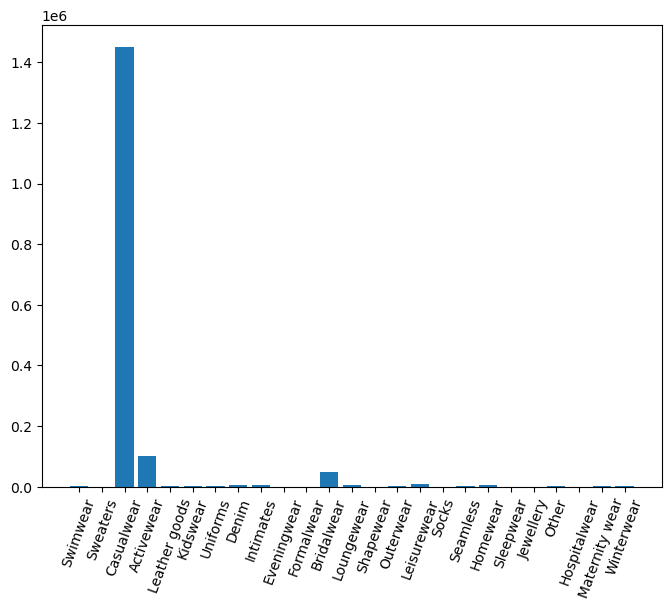

In [43]:
#product vs quantity bar chart

fig, ax = plt.subplots()

ax.bar(updated_inquery['product_name'],updated_inquery['bulk_order_quantity'])

# Call the function to set the figure properties
set_figure_properties(fig, ax, x_label_rotation=70)

# show the plot
plt.show()

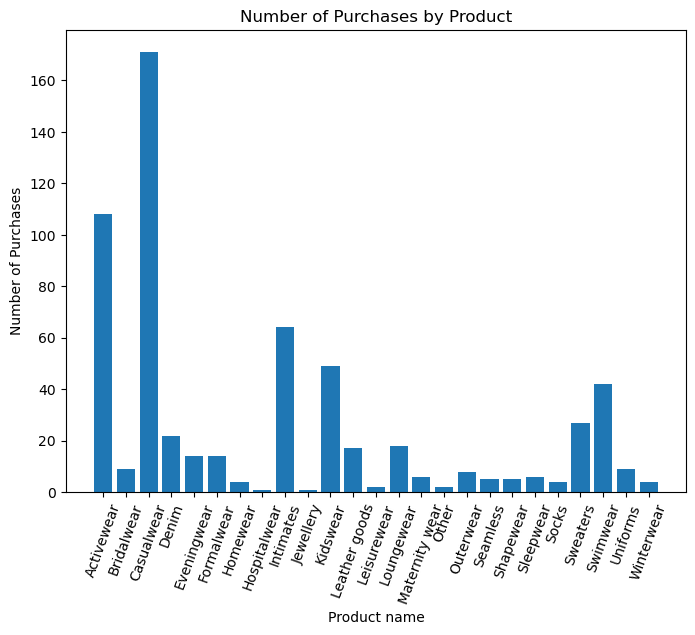

In [44]:
# count the number of purchases for each product type
product_count = updated_inquery.groupby('product_name')['id'].count()

fig, ax = plt.subplots()
ax.bar(product_count.index, product_count.values)

# Call the function to set the figure properties
set_figure_properties(fig, ax, x_label_rotation=70)

# set the x-axis label
plt.xlabel('Product name')

# set the y-axis label
plt.ylabel('Number of Purchases')

# set the plot title
plt.title('Number of Purchases by Product')

# show the plot
plt.show()

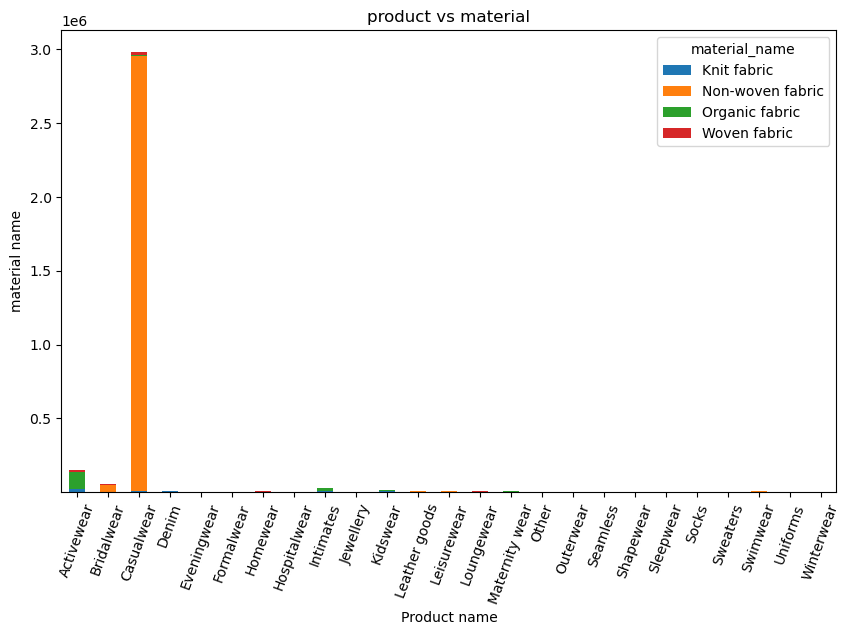

In [45]:
# Group by product and material, and calculate the sum of bulk order quantity for each group
grouped = updated_inquery.groupby(['product_name', 'material_name'])['bulk_order_quantity'].sum()

# Reshape the data to wide format, with products as rows and materials as columns
df_wide = grouped.unstack()

# Create a stacked bar chart
ax = df_wide.plot(kind='bar', stacked=True,figsize=(10,6))

# Call the function to set the figure properties
set_figure_properties(fig, ax, x_label_rotation=70)

# set the x-axis label
plt.xlabel('Product name')

# set the y-axis label
plt.ylabel('material name')

# set the plot title
plt.title('product vs material')

# show the plot
plt.show()

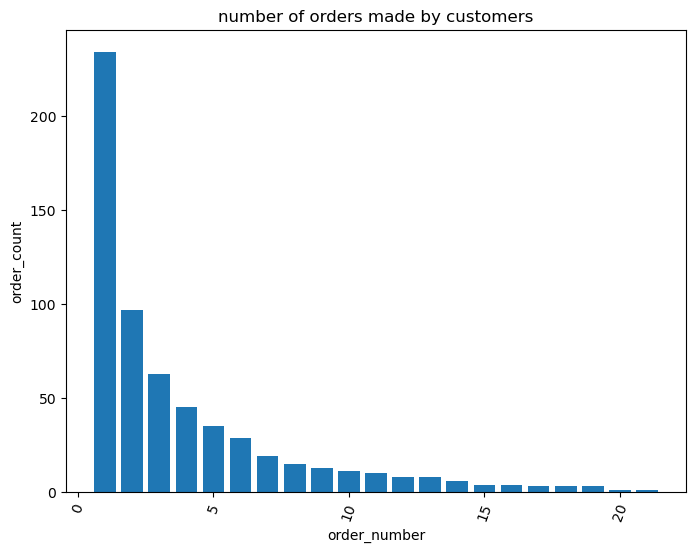

In [46]:
# count the number of purchases for each product type
order_count = updated_inquery.groupby('order_number')['id'].count()

fig, ax = plt.subplots()
ax.bar(order_count.index, order_count.values)

# Call the function to set the figure properties
set_figure_properties(fig, ax, x_label_rotation=70)

# set the x-axis label
plt.xlabel('order_number')

# set the y-axis label
plt.ylabel('order_count')

# set the plot title
plt.title('number of orders made by customers')

# show the plot
plt.show()

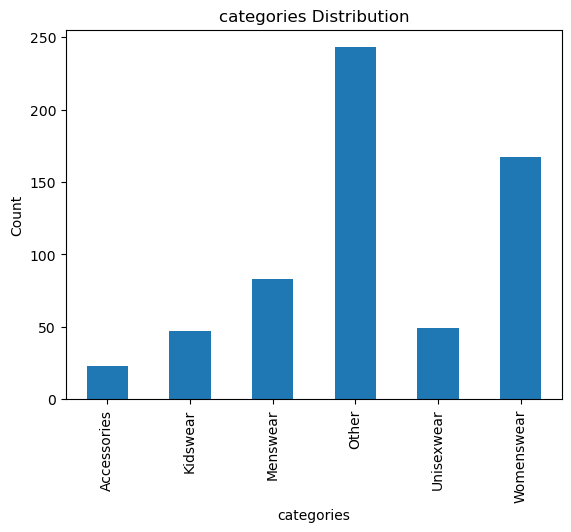

In [47]:
# group by package type and count the number of rows in each group
grouped = updated_inquery.groupby('categories').size()

# create a bar chart
ax = grouped.plot(kind='bar')

# set the x-axis label
ax.set_xlabel('categories')

# set the y-axis label
ax.set_ylabel('Count')

# set the plot title
ax.set_title('categories Distribution')

# show the plot
plt.show()

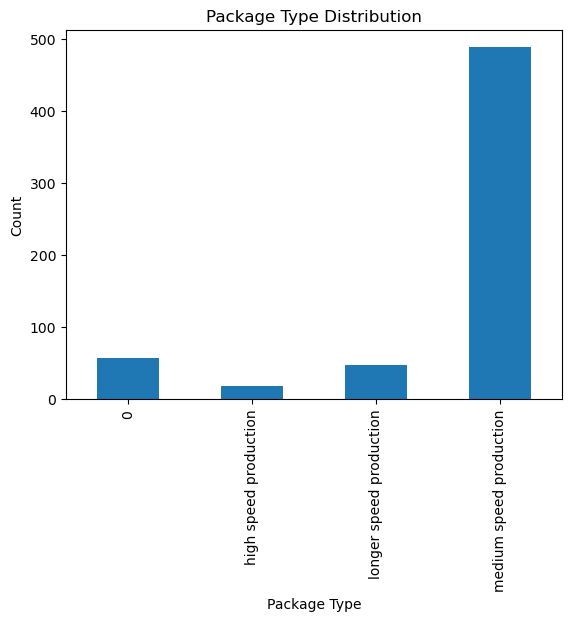

In [48]:
# group by package type and count the number of rows in each group
grouped = updated_inquery.groupby('package').size()

# create a bar chart
ax = grouped.plot(kind='bar')

# set the x-axis label
ax.set_xlabel('Package Type')

# set the y-axis label
ax.set_ylabel('Count')

# set the plot title
ax.set_title('Package Type Distribution')

# show the plot
plt.show()

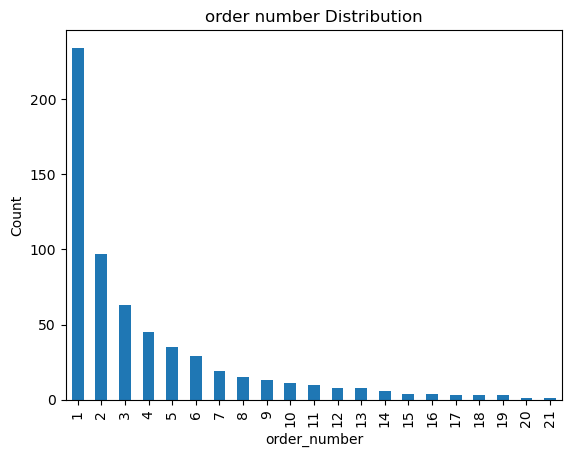

In [49]:
# group by package type and count the number of rows in each group
grouped = updated_inquery.groupby('order_number').size()

# create a bar chart
ax = grouped.plot(kind='bar')

# set the x-axis label
ax.set_xlabel('order_number')

# set the y-axis label
ax.set_ylabel('Count')

# set the plot title
ax.set_title('order number Distribution')

# show the plot
plt.show()

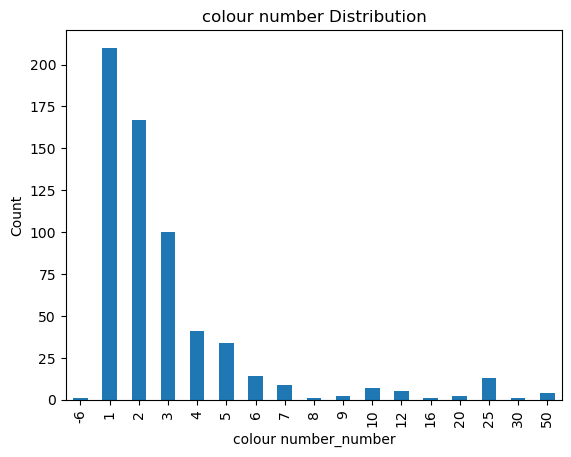

In [50]:
# group by package type and count the number of rows in each group
grouped = updated_inquery.groupby('colour_number').size()

# create a bar chart
ax = grouped.plot(kind='bar')

# set the x-axis label
ax.set_xlabel('colour number_number')

# set the y-axis label
ax.set_ylabel('Count')

# set the plot title
ax.set_title('colour number Distribution')

# show the plot
plt.show()

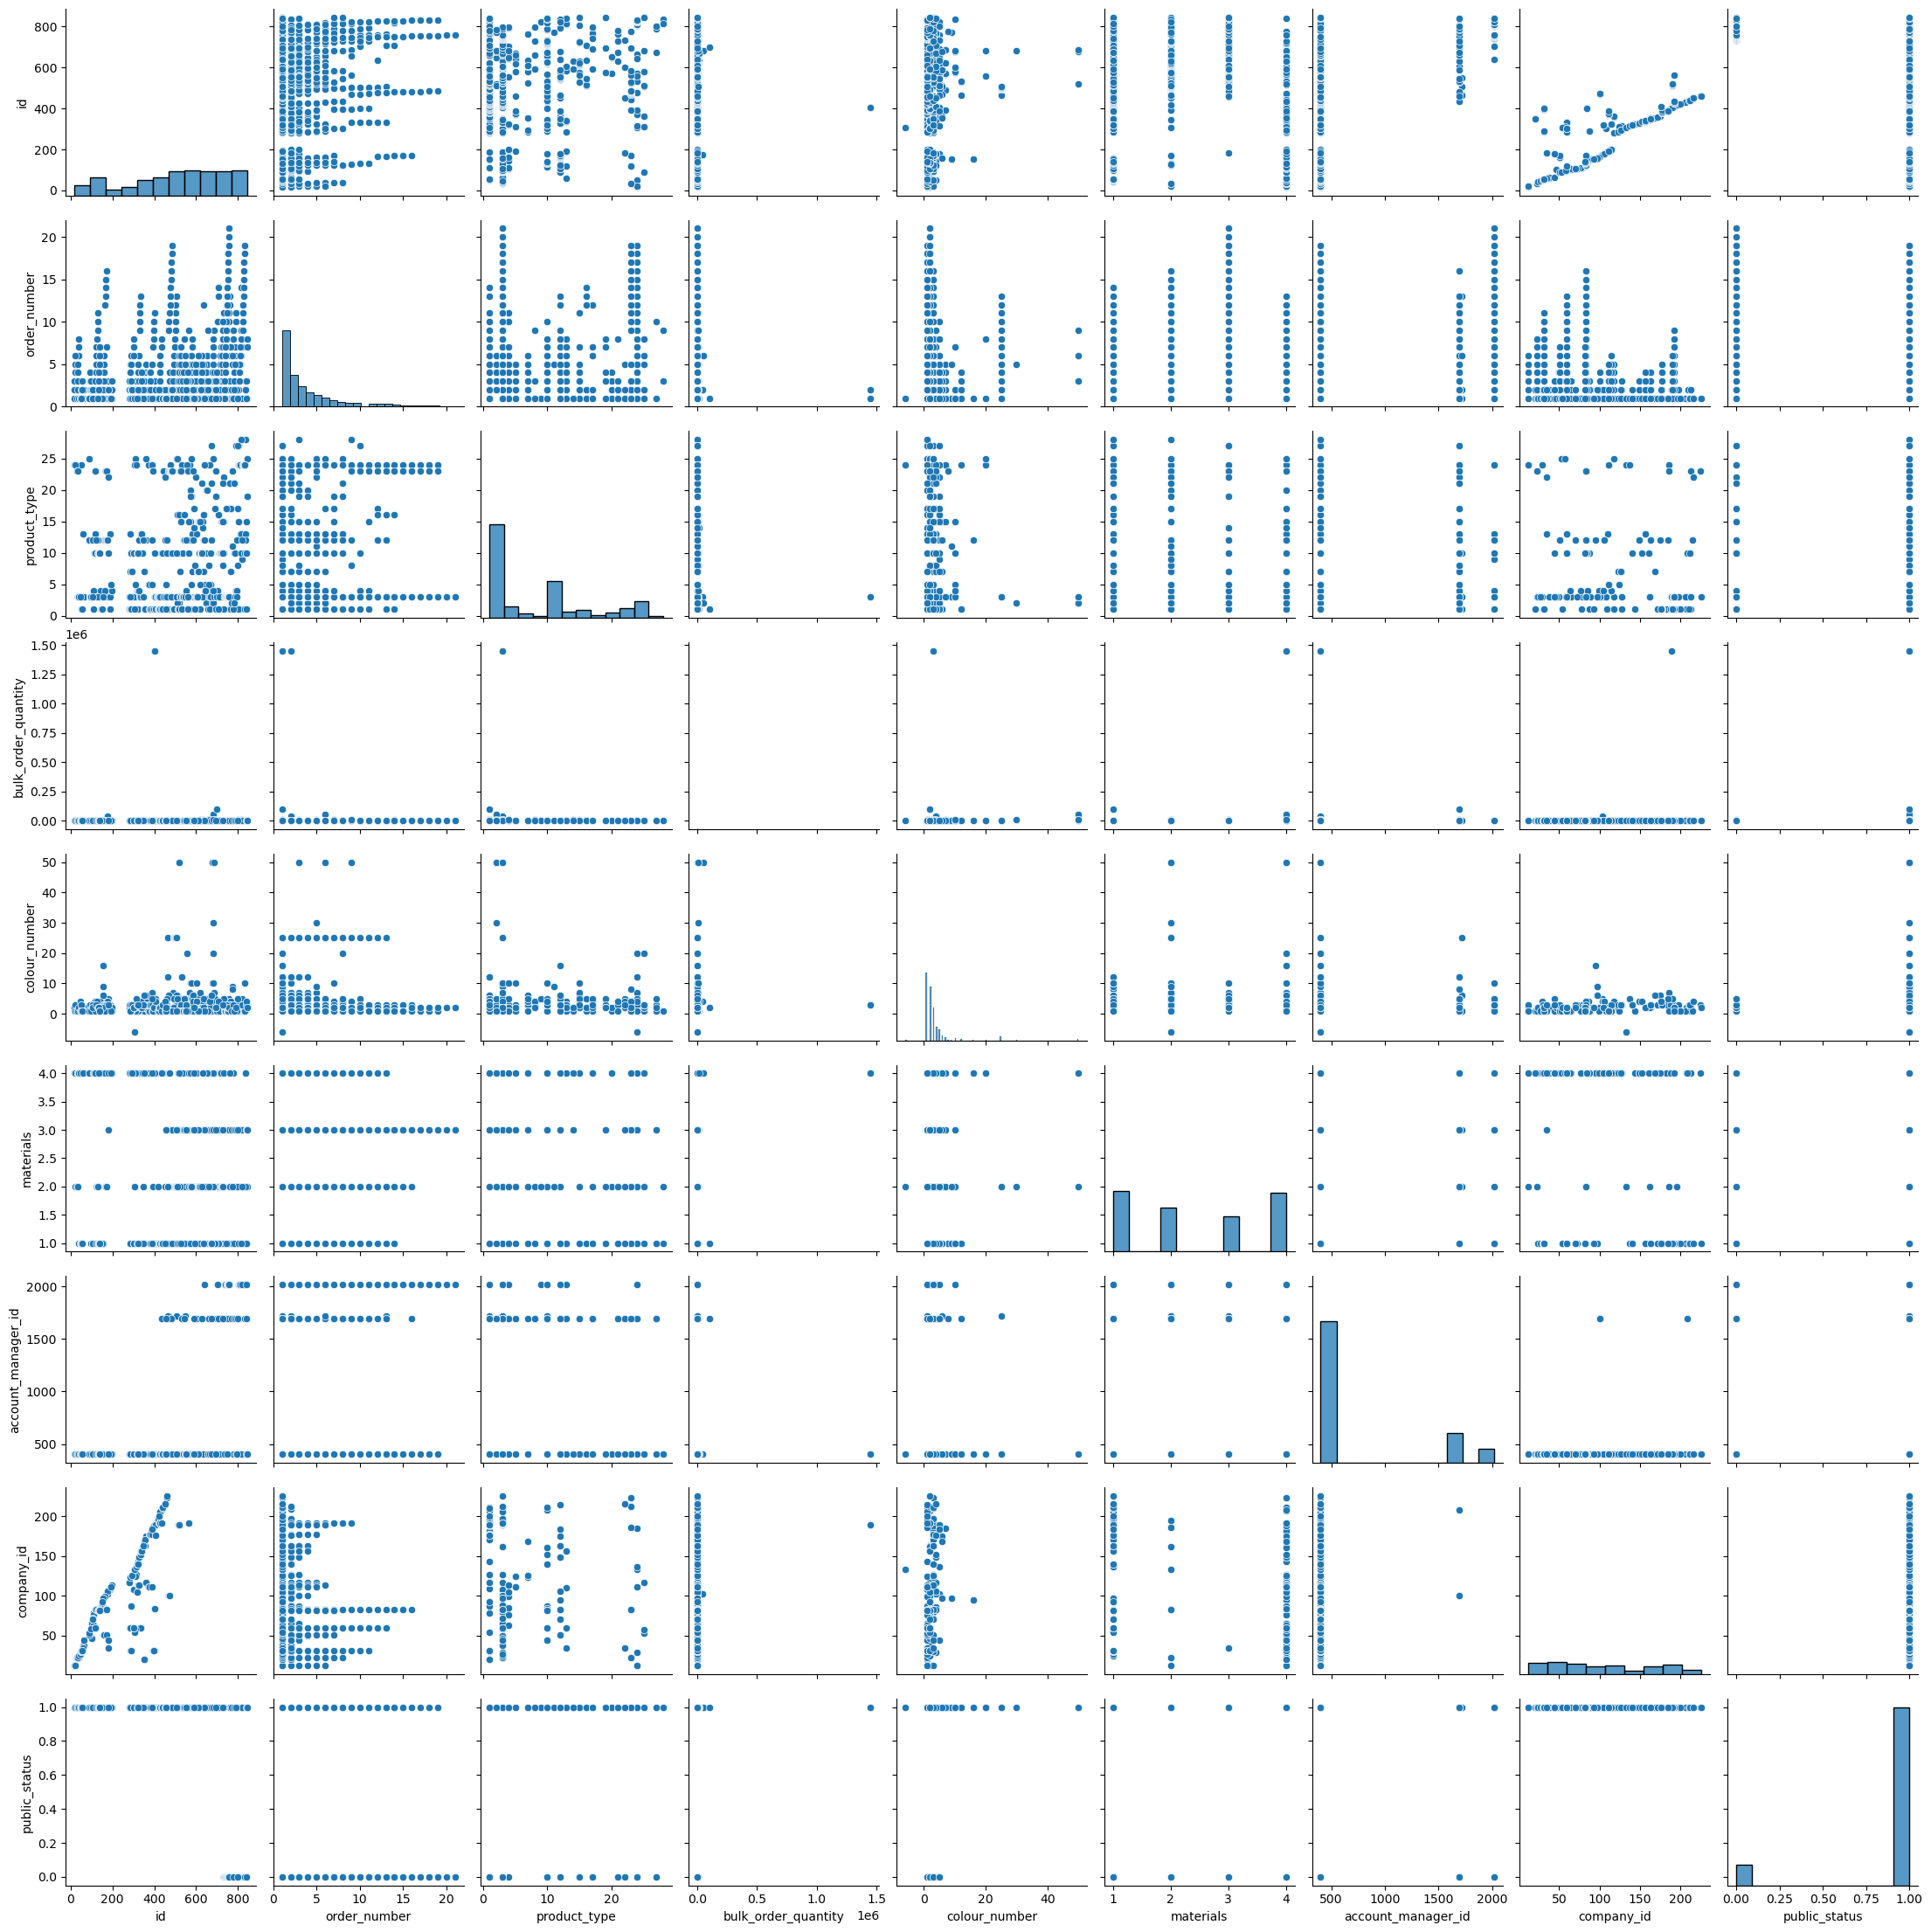

In [51]:
sns.pairplot(updated_inquery)
plt.show()

## Data Preprocessing

In [52]:
input_data = updated_inquery.drop('bulk_order_quantity', axis=1)
outpu_data = updated_inquery['bulk_order_quantity']

In [53]:
input_data

,id,order_number,product_type,colour_number,materials,currency,order_date,order_completed_date,categories,account_manager_id,company_id,status,public_status,package,style_name,product_name,product_code,material_name,materials_code
0,17,1,24,1,4,GBP,2019-11-03 08:06:29,2022-06-03 16:21:12,Other,402.0,12.0,inactive,1,medium speed production,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric
1,18,2,24,2,4,GBP,2019-11-03 08:07:04,2022-06-03 16:19:31,Other,402.0,12.0,inactive,1,medium speed production,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric
2,19,3,24,2,4,GBP,2019-11-03 08:07:27,2022-06-03 16:22:43,Other,402.0,12.0,inactive,1,medium speed production,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric
3,20,4,24,3,4,GBP,2019-11-03 08:08:05,2022-06-03 16:17:43,Other,402.0,12.0,inactive,1,medium speed production,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric
4,21,5,24,1,4,GBP,2019-11-03 08:08:25,2022-06-03 16:16:46,Other,402.0,12.0,inactive,1,medium speed production,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,843,7,19,2,3,USD,2023-01-23 15:26:05,2023-01-23 15:28:34,Menswear,402.0,NaN,active,1,medium speed production,NaN,Seamless,seamless,Knit fabric,knit_fabric
608,844,8,19,2,3,USD,2023-01-23 15:26:17,2023-01-23 15:29:33,Menswear,402.0,NaN,active,1,medium speed production,NaN,Seamless,seamless,Knit fabric,knit_fabric
609,592,1,14,2,3,USD,2021-10-23 15:34:20,2022-05-23 12:46:22,Menswear,402.0,NaN,inactive,1,medium speed production,NaN,Leisurewear,leisure,Knit fabric,knit_fabric
610,789,10,27,2,3,GBP,2022-08-23 10:18:37,2022-08-23 15:57:07,Womenswear,1693.0,NaN,active,1,longer speed production,NaN,Winterwear,winter,Knit fabric,knit_fabric


## Feature Transformation

In [54]:
input_data['year'] = pd.to_datetime(input_data['order_date']).dt.year
input_data['month'] = pd.to_datetime(input_data['order_date']).dt.month
input_data = input_data.drop('order_date', axis=1)

In [55]:
input_data

,id,order_number,product_type,colour_number,materials,currency,order_completed_date,categories,account_manager_id,company_id,status,public_status,package,style_name,product_name,product_code,material_name,materials_code,year,month
0,17,1,24,1,4,GBP,2022-06-03 16:21:12,Other,402.0,12.0,inactive,1,medium speed production,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric,2019,11
1,18,2,24,2,4,GBP,2022-06-03 16:19:31,Other,402.0,12.0,inactive,1,medium speed production,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric,2019,11
2,19,3,24,2,4,GBP,2022-06-03 16:22:43,Other,402.0,12.0,inactive,1,medium speed production,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric,2019,11
3,20,4,24,3,4,GBP,2022-06-03 16:17:43,Other,402.0,12.0,inactive,1,medium speed production,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric,2019,11
4,21,5,24,1,4,GBP,2022-06-03 16:16:46,Other,402.0,12.0,inactive,1,medium speed production,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric,2019,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,843,7,19,2,3,USD,2023-01-23 15:28:34,Menswear,402.0,NaN,active,1,medium speed production,NaN,Seamless,seamless,Knit fabric,knit_fabric,2023,1
608,844,8,19,2,3,USD,2023-01-23 15:29:33,Menswear,402.0,NaN,active,1,medium speed production,NaN,Seamless,seamless,Knit fabric,knit_fabric,2023,1
609,592,1,14,2,3,USD,2022-05-23 12:46:22,Menswear,402.0,NaN,inactive,1,medium speed production,NaN,Leisurewear,leisure,Knit fabric,knit_fabric,2021,10
610,789,10,27,2,3,GBP,2022-08-23 15:57:07,Womenswear,1693.0,NaN,active,1,longer speed production,NaN,Winterwear,winter,Knit fabric,knit_fabric,2022,8


## Feature Encoding

In [56]:
#list of categorical features
cat_cols = list(input_data.select_dtypes(exclude="number").columns)

#list of numerical features
num_cols = list(input_data.select_dtypes(include="number").columns)

#print the columns
print('categorical_features::',cat_cols)
print('numerical features:',num_cols)

categorical_features:: ['currency', 'order_completed_date', 'categories', 'status', 'package', 'style_name', 'product_name', 'product_code', 'material_name', 'materials_code']
numerical features: ['id', 'order_number', 'product_type', 'colour_number', 'materials', 'account_manager_id', 'company_id', 'public_status', 'year', 'month']


In [58]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612 entries, 0 to 611
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    612 non-null    int64  
 1   order_number          612 non-null    int64  
 2   product_type          612 non-null    int64  
 3   colour_number         612 non-null    int64  
 4   materials             612 non-null    int64  
 5   currency              612 non-null    object 
 6   order_completed_date  612 non-null    object 
 7   categories            612 non-null    object 
 8   account_manager_id    570 non-null    float64
 9   company_id            232 non-null    float64
 10  status                612 non-null    object 
 11  public_status         612 non-null    int64  
 12  package               612 non-null    object 
 13  style_name            57 non-null     object 
 14  product_name          612 non-null    object 
 15  product_code          6

In [60]:
input_data[cat_cols] = input_data[cat_cols].astype(str)

In [61]:
#converting all the categorical varables to numerical using ordinal encoding
from sklearn import preprocessing
ord_enc = preprocessing.OrdinalEncoder()
input_data[cat_cols] = ord_enc.fit_transform(input_data[cat_cols])

In [64]:
input_data

,id,order_number,product_type,colour_number,materials,currency,order_completed_date,categories,account_manager_id,company_id,status,public_status,package,style_name,product_name,product_code,material_name,materials_code,year,month
0,17,1,24,1,4,2.0,388.0,3.0,402.0,12.0,2.0,1,3.0,52.0,22.0,22.0,1.0,1.0,2019,11
1,18,2,24,2,4,2.0,387.0,3.0,402.0,12.0,2.0,1,3.0,52.0,22.0,22.0,1.0,1.0,2019,11
2,19,3,24,2,4,2.0,389.0,3.0,402.0,12.0,2.0,1,3.0,52.0,22.0,22.0,1.0,1.0,2019,11
3,20,4,24,3,4,2.0,385.0,3.0,402.0,12.0,2.0,1,3.0,52.0,22.0,22.0,1.0,1.0,2019,11
4,21,5,24,1,4,2.0,384.0,3.0,402.0,12.0,2.0,1,3.0,52.0,22.0,22.0,1.0,1.0,2019,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,843,7,19,2,3,3.0,573.0,2.0,402.0,NaN,0.0,1,3.0,52.0,17.0,17.0,0.0,0.0,2023,1
608,844,8,19,2,3,3.0,574.0,2.0,402.0,NaN,0.0,1,3.0,52.0,17.0,17.0,0.0,0.0,2023,1
609,592,1,14,2,3,3.0,123.0,2.0,402.0,NaN,2.0,1,3.0,52.0,12.0,12.0,0.0,0.0,2021,10
610,789,10,27,2,3,2.0,469.0,5.0,1693.0,NaN,0.0,1,2.0,52.0,24.0,24.0,0.0,0.0,2022,8


In [ ]:
df = pd.read_csv('categories.csv')
df

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data into a DataFrame
data = pd.read_csv('customer_orders.csv')

# Data cleaning and preprocessing
data.dropna(inplace=True)
X = data.drop('order_quantity', axis=1)
y = data['order_quantity']

# Feature engineering
X['year'] = pd.to_datetime(X['order_date']).dt.year
X['month'] = pd.to_datetime(X['order_date']).dt.month
X = X.drop('order_date', axis=1)

# Feature selection
X = X[['customer_id', 'product_id', 'year', 'month']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model selection and training
model = LinearRegression()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

# Hyperparameter tuning
# This step may involve using techniques such as grid search or randomized search to find the optimal hyperparameters for the model.

# Deployment and monitoring
# Once the model is trained and optimized, it can be deployed to production and monitored for performance.


,id,order_number,product_type,bulk_order_quantity,colour_number,materials,currency,order_completed_date,categories,account_manager_id,company_id,status,public_status,package,style_name,product_name,product_code,material_name,materials_code
order_date,,,,,,,,,,,,,,,,,,,
2019-11-03 08:06:29,17,1,24,1,1,4,GBP,2022-06-03 16:21:12,Other,402.0,12.0,inactive,1,medium speed production,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric
2019-11-03 08:07:04,18,2,24,1,2,4,GBP,2022-06-03 16:19:31,Other,402.0,12.0,inactive,1,medium speed production,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric
2019-11-03 08:07:27,19,3,24,1,2,4,GBP,2022-06-03 16:22:43,Other,402.0,12.0,inactive,1,medium speed production,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric
2019-11-03 08:08:05,20,4,24,3,3,4,GBP,2022-06-03 16:17:43,Other,402.0,12.0,inactive,1,medium speed production,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric
2019-11-03 08:08:25,21,5,24,1,1,4,GBP,2022-06-03 16:16:46,Other,402.0,12.0,inactive,1,medium speed production,NaN,Swimwear,swim,Non-woven fabric,non_woven_fabric
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-23 15:26:05,843,7,19,600,2,3,USD,2023-01-23 15:28:34,Menswear,402.0,NaN,active,1,medium speed production,NaN,Seamless,seamless,Knit fabric,knit_fabric
2023-01-23 15:26:17,844,8,19,600,2,3,USD,2023-01-23 15:29:33,Menswear,402.0,NaN,active,1,medium speed production,NaN,Seamless,seamless,Knit fabric,knit_fabric
2021-10-23 15:34:20,592,1,14,200,2,3,USD,2022-05-23 12:46:22,Menswear,402.0,NaN,inactive,1,medium speed production,NaN,Leisurewear,leisure,Knit fabric,knit_fabric


In [99]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from mcompvar import MCOMPVAR
from statsmodels.tsa.statespace.varmax import VARMAX

# Load and preprocess multivariate time series data
data = updated_inquery
data['order_date'] = pd.to_datetime(data['order_date'])
data.set_index('order_date', inplace=True)

# Set up MCOMPVAR model
model = MCOMPVAR(data.values)

# Select 3 composite variates to use for forecasting
model.select_composite_variates(3)

# Build ARIMA models for each composite variate
composite_variate_models = []
for i in range(model.ncomposites):
    cv_data = model.composite_variates[:, i]
    cv_model = ARIMA(cv_data, order=(1, 0, 0)).fit()
    composite_variate_models.append(cv_model)

# Make predictions for each variable in the original multivariate time series
predictions = []
for i in range(data.shape[1]):
    var_data = data.iloc[:, i].values
    var_predictions = []
    for j in range(len(composite_variate_models)):
        cv_model = composite_variate_models[j]
        cv_weights = model.composite_variate_weights[:, j]
        cv_prediction = cv_model.forecast(steps=3)[-1] * cv_weights[i]
        var_predictions.append(cv_prediction)
    var_prediction = sum(var_predictions)
    predictions.append(var_prediction)

# Convert predictions to DataFrame and output to CSV
predictions = pd.DataFrame(predictions, columns=data.columns)
predictions.index = pd.date_range(data.index[-1], periods=3, freq='M')
predictions.to_csv('multivariate_predictions.csv')


ModuleNotFoundError: No module named 'mcompvar'

In [105]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
# from mcompvar import MCOMPVAR
from statsmodels.tsa.statespace.varmax import VARMAX

# Load and preprocess multivariate time series data
data[['id','product_type','bulk_order_quantity','order_date']] = updated_inquery[['id','product_type','bulk_order_quantity','order_date']]
data['order_date'] = pd.to_datetime(data['order_date'])
data.set_index('order_date', inplace=True)

KeyError: "['order_date'] not in index"

In [106]:
# Split the data into training and testing sets
train_data = data.iloc[:-3]
test_data = data.iloc[-3:]

# Set up VARMAX model
model = VARMAX(train_data, order=(1, 0), trend='c')
results = model.fit(maxiter=1000, disp=False)

# Make predictions for the test set
predictions = results.forecast(steps=3)

# Convert predictions to DataFrame and output to CSV
predictions = pd.DataFrame(predictions, columns=data.columns)
predictions.index = pd.date_range(data.index[-1], periods=3, freq='M')
predictions.to_csv('multivariate_predictions.csv')

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

AttributeError: module 'numpy' has no attribute 'asaaray'